<a href="https://colab.research.google.com/github/Shemonti/Breast-Histology-Images/blob/main/Breast_Histopathology_Images_Normal_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import fnmatch
import os
import PIL
import glob
import tensorflow as tf
from matplotlib.image import  imread
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x -Y "/content/drive/MyDrive/data_used (1).rar" 

Streaming output truncated to the last 5000 lines.
Extracting  data_used/IDC/12906_idx5_x1701_y1701_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1751_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1801_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1851_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1901_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y1951_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2001_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2151_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2201_class1.png               35%  OK 
Extracting  data_used/IDC/12906_idx5_x1701_y2251_class1.png               35%  OK 
Extracting  data_used/IDC/129

In [ ]:
import pathlib
dt_dir='/content/data_used'
data_dir = pathlib.Path(dt_dir)
data_dir

PosixPath('/content/data_used')

In [ ]:
 NORMAL=list(data_dir.glob('NORMAL/*.png'))
 NORMAL[:5]

[PosixPath('/content/data_used/NORMAL/12869_idx5_x1051_y1551_class0.png'),
 PosixPath('/content/data_used/NORMAL/12878_idx5_x251_y1601_class0.png'),
 PosixPath('/content/data_used/NORMAL/12868_idx5_x701_y1951_class0.png'),
 PosixPath('/content/data_used/NORMAL/12875_idx5_x851_y301_class0.png'),
 PosixPath('/content/data_used/NORMAL/12872_idx5_x1901_y551_class0.png')]

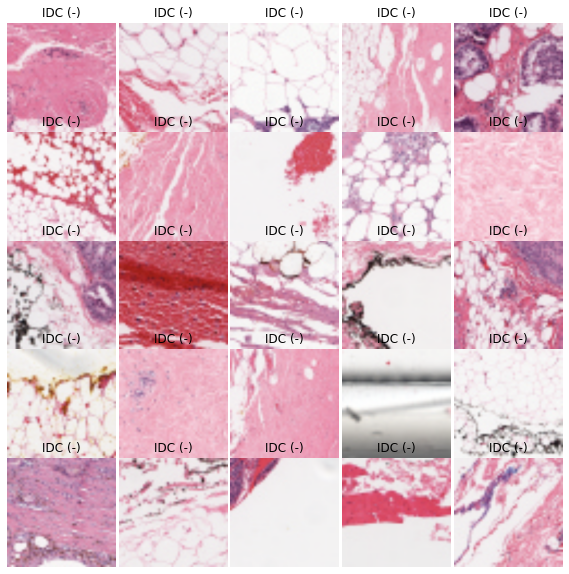

In [ ]:
NORMAL=list(data_dir.glob('NORMAL/*.png'))
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for imgname in NORMAL[:25]:
    im = cv2.imread(str(imgname))
    im = cv2.resize(im, (227, 227)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.axis('off')        
    plt.title('IDC (-)')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
     #.set_title(l)
     
    i_ += 1

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

7500


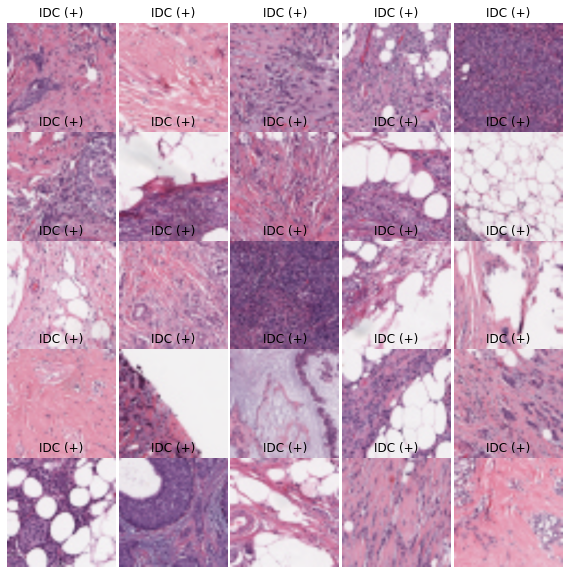

In [ ]:
IDC=list(data_dir.glob('IDC/*.png'))
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for imgname in IDC[:25]:
   



    im = cv2.imread(str(imgname))
    im = cv2.resize(im, (227, 227)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.axis('off')        
    plt.title('IDC (+)')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
     #.set_title(l)
     
    i_ += 1

In [ ]:
breast_images_dict = {
    'IDC(-)': list(data_dir.glob('NORMAL/*.png')),
    'IDC(+)': list(data_dir.glob('IDC/*.png')),
    
}

In [ ]:
breast_labels_dict = {
    'IDC(-)': 0,
    'IDC(+)': 1
   
}

In [ ]:
X, y = [], []

for breast_name, images in breast_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        im = cv2.resize(img, (64, 64))
        X.append(im)
        y.append(breast_labels_dict[breast_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(7500, 64, 64, 3)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
len(y)

7500

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5250, 64, 64, 3) (675, 64, 64, 3) (1575, 64, 64, 3) (5250,) (675,) (1575,)


In [ ]:
len(X_train)

5250

In [ ]:
len(X_test)

675

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
X_val_scaled = X_val / 255

In [ ]:
data_augmentation = keras.Sequential(
  [
   layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(64, 
                                                              64,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:


model = Sequential([
  data_augmentation,                  
  layers.Conv2D(32, 3,  padding = 'same', activation = 'relu', input_shape = (64,64,3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Conv2D(64, 3,  padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),


  layers.Conv2D(115, 3,  padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  
  layers.Conv2D(128, 3,  padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),


  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:

  # Saved the Best Model
filepath = "/content/drive/MyDrive/best_moel/mymodel_1_c.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='min')

In [ ]:
history=model.fit(X_train_scaled, y_train, epochs=20,validation_data = (X_val_scaled,y_val),callbacks=[checkpoint],batch_size=7)

Epoch 1/20
745/750 [============================>.] - ETA: 0s - loss: 0.6177 - accuracy: 0.6608
Epoch 1: val_loss improved from inf to 0.43975, saving model to /content/drive/MyDrive/best_moel/mymodel_1_c.h5
750/750 [==============================] - 16s 6ms/step - loss: 0.6168 - accuracy: 0.6613 - val_loss: 0.4398 - val_accuracy: 0.7841
Epoch 2/20
741/750 [============================>.] - ETA: 0s - loss: 0.3582 - accuracy: 0.8579
Epoch 2: val_loss improved from 0.43975 to 0.28497, saving model to /content/drive/MyDrive/best_moel/mymodel_1_c.h5
750/750 [==============================] - 5s 6ms/step - loss: 0.3577 - accuracy: 0.8585 - val_loss: 0.2850 - val_accuracy: 0.8806
Epoch 3/20
749/750 [============================>.] - ETA: 0s - loss: 0.3103 - accuracy: 0.8831
Epoch 3: val_loss improved from 0.28497 to 0.27269, saving model to /content/drive/MyDrive/best_moel/mymodel_1_c.h5
750/750 [==============================] - 4s 6ms/step - loss: 0.3101 - accuracy: 0.8832 - val_loss: 0.27

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [ ]:
model = load_model("/content/drive/MyDrive/best_moel/mymodel_1_c.h5")

In [ ]:
model.evaluate(X_test_scaled,y_test)

22/22 [==============================] - 10s 9ms/step - loss: 0.1933 - accuracy: 0.9096


[0.1932985633611679, 0.9096296429634094]

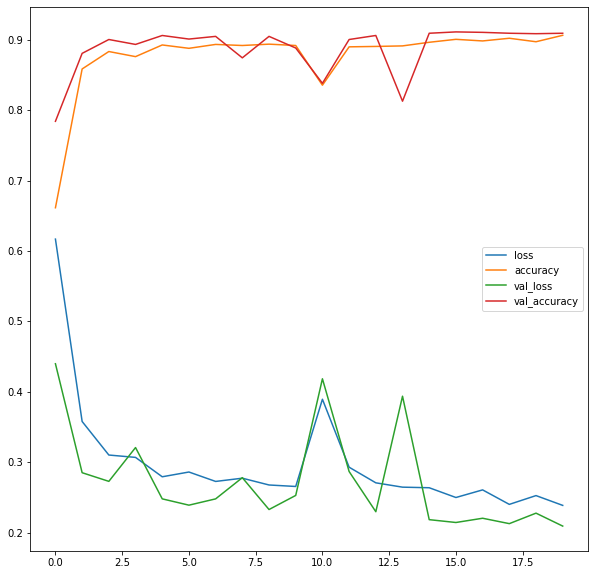

In [ ]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

In [ ]:
predictions = model.predict(X_test_scaled)
predictions[:5]

array([[0.99434066, 0.00565926],
       [0.99004525, 0.00995468],
       [0.039823  , 0.96017706],
       [0.1827147 , 0.8172853 ],
       [0.12707245, 0.8729276 ]], dtype=float32)

In [ ]:
y_pred = [np.argmax(element) for element in predictions]
y_pred[:5]

[0, 0, 1, 1, 1]

In [ ]:
y_test[:5]

array([0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       416
           1       0.87      0.90      0.88       259

    accuracy                           0.91       675
   macro avg       0.90      0.91      0.91       675
weighted avg       0.91      0.91      0.91       675



In [ ]:
confusion=(confusion_matrix(y_test,y_pred))

Text(87.0, 0.5, 'Truth')

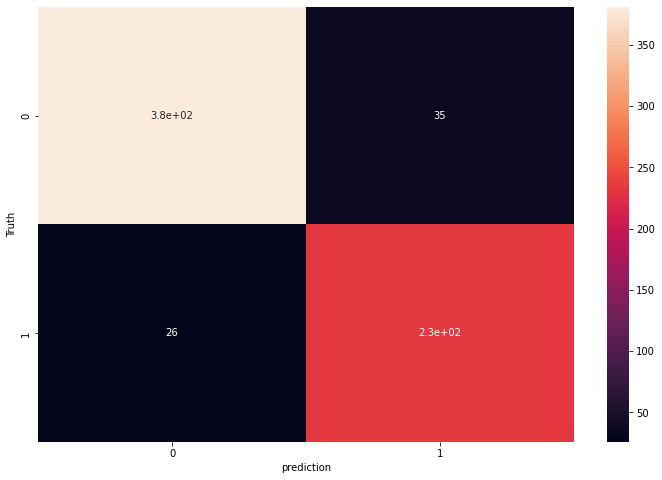

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion,annot=True)
plt.xlabel('prediction')
plt.ylabel('Truth')

In [ ]:
from sklearn import metrics

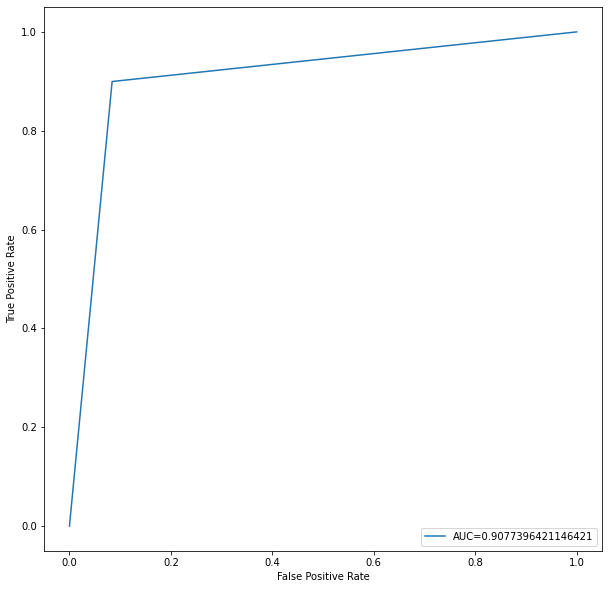

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()